# <a id='toc1_'></a>[PCE:Couplage de Rdkit Crest-xTB avec AlGORITHME DE SCHARBER ](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique

25 Mai 2024

####  <a id='toc1_3_'></a>[DESCRIPTION](#toc0_)

* Nos travaux de mémoire sont basés sur le flux de travail de Tartarus. L'algorithme est le suivant :
<img src="./Graphics/tartarusoverview.png" width="1500"></center>

 Une illustration du cadre Tartarus, mettant en évidence les tâches de conception réelles qui sont définies et associées à des flux de travail et des ensembles de données de simulation dans Tartarus




*  Notre objectif de recherche consiste à concevoir des petites molécules dotées de propriétés électroniques spécifiques, notamment des molécules capables d'effectuer la séparation des charges, inspirées de la conception photovoltaïque organique (OPV). Nous avons deux tâches individuelles :

- Recherche d'une molécule donneuse organique à utiliser avec l'ester méthylique de l'acide l'ester méthylique de
    l'acide ${[6,6]­phényl­C61­butyrique(PCBM)}$.
- Recherche d'une molécule accepteuse à utiliser dans des dispositifs basés sur le $ {poly[N­90­heptadécanyl­2,7­carbazole­alt­5,5­(40,70­di­2­thiényl­20,10,30­benzothiaMachine  (PCDTBT))}$.

*  Notre travail actuel porte sur le modèle ci-dessous :
<img src="./Graphics/opv.png" width="2000"></center>

 schématique du flux de travail de simulation de propriétés pour la conception de références photovoltaïques organiques
  

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers hce.csv et creer un DataFrame](#toc0_)
<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/Pandas.jpg)

In [1]:
import pandas.util  # Assuming 'util' is an alias for pandas.util
import pandas as pd
# Read the CSV file
df1 = pd.read_csv("hce.csv")

# Filter rows with pce_1 > 10.79
df_acc = df1[df1["pce_1"] > 10.79][["smiles", "pce_1","pce_2","pce_pcbm_sas", "pce_pcdtbt_sas","sas"]]

# Filter rows with pce_2 > 33.8
df_don = df1[df1["pce_2"] > 33.8][["smiles","pce_1", "pce_2","pce_pcbm_sas", "pce_pcdtbt_sas","sas"]]

# Concatenate DataFrames and reset index
my1_df = pd.concat([df_acc, df_don], ignore_index=True)
smiles1=['smiles0','smiles1','smiles2','smiles3','smiles4','smiles5',]
# Create a new column with 'smiles n' format (assuming 'n' starts from 1)
my1_df['smiles_key'] = smiles1  # Ensure smiles are strings

# Reorder columns
my1_df = my1_df[['smiles_key', 'smiles', 'pce_1', 'pce_2',"pce_pcbm_sas", "pce_pcdtbt_sas","sas"]]


print(my1_df.loc[4,'smiles'])

c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c32)c2[se]ccc12


In [2]:
my1_df

,smiles_key,smiles,pce_1,pce_2,pce_pcbm_sas,pce_pcdtbt_sas,sas
0,smiles0,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,10.802524,15.454414,6.795800,11.447689,4.006724
1,smiles1,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,10.799833,15.222096,6.970612,11.392876,3.829220
2,smiles2,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,10.796661,15.942718,7.075333,12.221391,3.721327
3,smiles3,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,0.000000,33.912133,-2.203358,31.708776,2.203358
4,smiles4,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,0.000000,33.889634,-4.088903,29.800731,4.088903
5,smiles5,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,0.000000,33.961095,-3.268084,30.693011,3.268084


####  <a id='toc1_3_'></a>[Utilisation de `RDKIT`pour la generer des coordonnees 3D xyz](#toc0_)

<img src="./Graphics/Rdkit.png" width="400"></center>

#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)
1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.


<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/MolecularDimension.png)

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
#from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem import AllChem
from pathlib import Path
#IPythonConsole.ipython_3d = True
import py3Dmol

import rdkit
print(rdkit.__version__)

2024.03.2


####  <a id='toc1_3_'></a>[Représentation des molécules 2D avec Draw en fonction du PCE des différentes molécules](#toc0_)

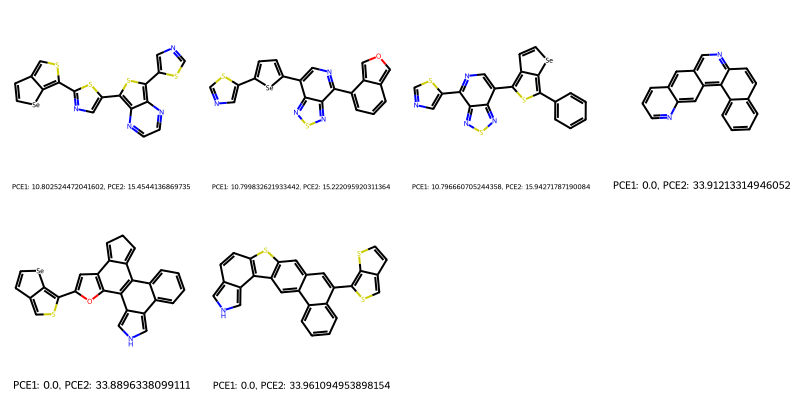

In [4]:
# Supposons que vous avez un DataFrame appelé df avec les colonnes 'smiles', 'pce_1' et 'pce_2'

mols_ls = [Chem.MolFromSmiles(my1_df.loc[i, 'smiles']) for i in my1_df.index]
legends = [f" PCE1: {pce_1}, PCE2: {pce_2}" for pce_1, pce_2 in zip(my1_df['pce_1'], my1_df['pce_2'])]
img = Draw.MolsToGridImage(mols_ls, molsPerRow=4, subImgSize=(200, 200), legends=legends)
img

####  <a id='toc1_3_'></a>[Représentation des molécules 3D avec py3Dmol ](#toc0_)

In [5]:
def view3D(mol, output_file, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)

        if fmt=='mol':
            view.addModel(Chem.MolToMolBlock(mol), fmt)
            # view.addModel(mol, fmt)
        elif fmt=='xyz':
            view.addModel(mol, fmt)

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})
        view.zoomTo()
        view.show()
        # view.png(output_file)

####  <a id='toc1_3_'></a>[Création d’un DataFrame pour stocker les descriptors des smiles ](#toc0_)

In [6]:
import os

from rdkit.Chem import Descriptors


prDFTrties = ['smiles_key','mol_rdkit' ,'SMILE', 'Poids_Moléculaire', 'LogP', 'TPSA', 'QED']
data = []

for i in range(len(my1_df)):
    mol_rdkit = Chem.MolFromSmiles(my1_df.loc[i, 'smiles'])
    smi_key=my1_df.loc[i, 'smiles_key']
    smi=my1_df.loc[i, 'smiles']
    if mol_rdkit is not None:
        # Ajoute les hydrogènes explicites
        mol_rdkit = Chem.AddHs(mol_rdkit)

        # Génère la conformation 3D initiale de la molécule
        AllChem.EmbedMolecule(mol_rdkit)

        # Optimise la conformation 3D de la molécule en utilisant MMFF
        AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")

        # Canonicalise l'orientation de la conformation
        Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

        # Calcul des descripteurs
        molwt = Descriptors.MolWt(mol_rdkit)
        logp = Descriptors.MolLogP(mol_rdkit)
        tpsa = Descriptors.TPSA(mol_rdkit)
        qed = Descriptors.qed(mol_rdkit)

        # Ajout des propriétés à la liste de données
        data.append([smi_key,mol_rdkit, smi,molwt, logp, tpsa, qed,])

        # Création du sous-répertoire "my_data_{smi_key}"
        working_dir = Path(f'./my_data250524/{smi_key}')
        working_dir.mkdir(parents=True, exist_ok=True)

        # Génération de la représentation 3D de la molécule après l'optimisation
        path_3d_rdkit = working_dir / f'{smi_key}_3d_rdkit.png'
        view3D(mol_rdkit, path_3d_rdkit)

        # Écriture des résultats dans un fichier
        with DFTn(working_dir / 'results.txt', 'w') as f:
            f.write(f'smiles_key: {smi_key}\n')
            f.write(f'SMILE: {smi}\n')
            f.write(f'Poids moléculaire: {molwt}\n')
            f.write(f'LogP: {logp}\n')
            f.write(f'TPSA: {tpsa}\n')
            f.write(f'QED: {qed}\n')

        # Génération du fichier mol_rdkit.xyz et optimisation avec GFN-XTB

df = pd.DataFrame(data, columns=prDFTrties)

[07:43:46] UFFTYPER: Unrecognized atom type: Se2+2 (19)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

[07:43:46] UFFTYPER: Unrecognized atom type: Se2+2 (9)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

[07:43:46] UFFTYPER: Unrecognized atom type: Se2+2 (19)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

[07:43:46] UFFTYPER: Unrecognized atom type: Se2+2 (27)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
df

,smiles_key,mol_rdkit,SMILE,Poids_Moléculaire,LogP,TPSA,QED
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,487.518,4.9806,51.56,0.292830
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,465.421,5.0558,64.70,0.330010
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,481.489,4.9191,51.56,0.299271
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,280.330,5.0894,25.78,0.291519
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,480.450,6.8075,28.93,0.222540
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,461.636,9.7854,15.79,0.234125


In [8]:
df.iloc[:,0:3]

,smiles_key,mol_rdkit,SMILE
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...


####  <a id='toc1_3_'></a>[Utilisation de crest et xTB pour la recherches des conformers](#toc0_)
 <center> <img src = "./Graphics/crest.png" width = "600">
 <img src = "./Graphics/xtb.jpeg" width = "600"> </center> 
 


####  <a id='toc1_3_'></a>[Workflow de Crest et xTB dans la recherches des conformers ](#toc0_)
 <center> <img src = "./Graphics/crestfeatures2.png" width = "600">
 <img src = "./Graphics/workflow.jpeg" width = "600"> </center> 


In [9]:
import xtb

In [10]:
!xtb --version

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.3.3 (71d3805) compiled by 'conda@b85dec0bf610' on 2021-01-07

normal termination of xtb


In [11]:
!crest --version


       |                                            |
       |                 C R E S T                  |
       |                                            |
       |  Conformer-Rotamer Ensemble Sampling Tool  |
       |          based on the GFN methods          |
       |             P.Pracht, S.Grimme             |
       |          Universitaet Bonn, MCTC           |
       Version 2.12,   Thu 19. Mai 16:32:32 CEST 2022
  Using the xTB program. Compatible with xTB version 6.4.0

   Cite work conducted with this code as

   • P.Pracht, F.Bohle, S.Grimme, PCCP, 2020, 22, 7169-7192.
   • S.Grimme, JCTC, 2019, 15, 2847-2862.

   and for works involving QCG as

   • S.Spicher, C.Plett, P.Pracht, A.Hansen, S.Grimme,
     JCTC, 2022, 18 (5), 3174-3189.

   with help from:
   C.Bannwarth, F.Bohle, S.Ehlert, S.Grimme,
   C.Plett, P.Pracht, S.Spicher

   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   M

In [12]:
import pandas as pd
import rdkit
from rdkit import Chem
import subprocess as sp
import re

def xtb_calculations(df):
    yesso= ["HOMO-LUMO GAP (eV)","TOTAL ENERGY (a.u.)", "HOMO Index", "LUMO Index", "HOMO Energy (eV)", "LUMO Energy (eV)"]
    dtb = []
    for i in range(len(df)):
        # Extract the SMILES string for the current row
        smile1 = df.loc[i, "mol_rdkit"]

       # Setting various paths for xtb files
        path_xtb_xyz = working_dir / f'{df.loc[i, "smiles_key"]}_opt.xyz'
        path_xtb_log = working_dir / f'{df.loc[i, "smiles_key"]}_opt.log'
        path_xtb_csv = working_dir / f'{df.loc[i, "smiles_key"]}_xtb.csv'
        path_xtb_png = working_dir / f'{df.loc[i, "smiles_key"]}_opt.png'

        # Check if path exists, if not create it
        if not path_xtb_xyz.exists():
            print(f'path_xtb_xyz does not exist and will be created for {smile1}')

        # Convert RDKit molecule to XYZ format
        mol_rdkit_xyz = Chem.MolToXYZBlock(smile1)
        with DFTn("mol_rdkit.xyz", "w") as f:
            f.write(mol_rdkit_xyz)

        # Geometry pre-optimization using GFn-XTB with different parameters
        sp.run(["xtb", "mol_rdkit.xyz", "--gfn2", "--opt", "vtight", "--parallel 1"],
               stdout=sp.PIPE, stderr=sp.PIPE, text=True, universal_newlines=True)

        # Best conformation search
        sp.run(['crest', 'xtbopt.xyz', '-gff', '-mquick', '--noreftopo'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

        # xtb geometry optimization of the crest best conformation
        xtb_process = sp.run(["xtb", 'crest_best.xyz', "--gfn2", "--opt", "vtight", "--parallel 1"],
                              stdout=sp.PIPE, stderr=sp.PIPE, text=True, universal_newlines=True)

        # Store the xtbopt.xyz file in path_xtb_xyz
        sp.run(['cp', 'xtbopt.xyz', path_xtb_xyz], stdout=sp.PIPE, stderr=sp.DEVNULL)

        with DFTn(path_xtb_log, "w") as fl:
            fl.write(xtb_process.stdout)

        # Extract the total energy and Homo-lumo gap from the xtb output file
        # Find TOTAL ENERGY value
        tot_energy_line = [li for li in path_xtb_log.read_text().splitlines() if 'TOTAL ENERGY' in li]
        tot_energy_line = tot_energy_line[0].split()
        tot_energy_xtb = float(tot_energy_line[3])

        # Find HOMO-LUMO GAP value
        HL_gap_line = [li for li in path_xtb_log.read_text().splitlines() if 'HOMO-LUMO GAP' in li]
        HL_gap_line = HL_gap_line[0].split()
        HL_gap_xtb = float(HL_gap_line[3])

        # Find HOMO index
        Homo_idx_line = [li for li in path_xtb_log.read_text().splitlines() if '(HOMO)' in li]
        Homo_idx_line = Homo_idx_line[0].split()
        Homo_idx_xtb = int(Homo_idx_line[0])
        EHomo_xtb = float(Homo_idx_line[3])

        # Find LUMO index
        Lumo_idx_line = [li for li in path_xtb_log.read_text().splitlines() if '(LUMO)' in li]
        Lumo_idx_line = Lumo_idx_line[0].split()
        Lumo_idx_xtb = int(Lumo_idx_line[0])
        ELumo_xtb = float(Lumo_idx_line[2])

        # Extract the total energy, Homo-lumo gap, Homo energy, and Lumo energy from the xtb output file
        # Find HOMO-LUMO GAP value
        match_gap = re.search(r"HOMO-LUMO GAP\s+(\d+\.\d+)\s+eV", path_xtb_log.read_text())
        if match_gap:
            HL_gap_xtb = float(match_gap.group(1))

        # Find TOTAL ENERGY value
        match_energy = re.search(r"TOTAL ENERGY\s+(-?\d+\.\d+)", path_xtb_log.read_text())
        if match_energy:
            tot_energy_xtb = float(match_energy.group(1))

        # Find HOMO energy
        match_homo = re.search(r"(\d+)\.\s+\d+\.\d+\s+(-\d+\.\d+)\s+\(HOMO\)", path_xtb_log.read_text())
        if match_homo:
            Homo_idx_xtb = int(match_homo.group(1))
            EHomo_xtb = float(match_homo.group(2))

        # Find LUMO energy 
        match_lumo = re.search(r"(\d+)\.\s+\S+\s+(-\d+\.\d+)\s+\(LUMO\)", path_xtb_log.read_text())
        if match_lumo:
            Lumo_idx_xtb = int(match_lumo.group(1))
            ELumo_xtb = float(match_lumo.group(2))
    
        # Create the xtb results dataframe
        dtb.append([ HL_gap_xtb, tot_energy_xtb, Homo_idx_xtb, Lumo_idx_xtb, EHomo_xtb, ELumo_xtb])
    df_xtb = pd.DataFrame(dtb, columns=yesso)

    return df_xtb

In [13]:
df_xtb=xtb_calculations(df)

#### Extraction  du  E_Homo,E_lumo,le E_gap
### OM
<center><img src="./Graphics/Molecule_HOMO-LUMO_diagram.png" width="600">

In [14]:
df_xtb

,HOMO-LUMO GAP (eV),TOTAL ENERGY (a.u.),HOMO Index,LUMO Index,HOMO Energy (eV),LUMO Energy (eV)
0,1.046699,-70.454255,65,66,-9.9819,-8.9079
1,1.055455,-73.343015,67,68,-9.9790,-8.9353
2,1.014844,-72.520881,67,68,-9.9452,-8.9708
3,1.875513,-54.796822,51,52,-10.0645,-8.1631
4,1.564838,-78.883165,73,74,-9.1773,-7.5813
5,1.936728,-80.300413,75,76,-9.4679,-7.6950


In [15]:
# Save the xtb results dataframe to a file


## Fusion de DataFrame

In [16]:
my_df=pd.concat([df, df_xtb], axis=1)

In [17]:
my_df

,smiles_key,mol_rdkit,SMILE,Poids_Moléculaire,LogP,TPSA,QED,HOMO-LUMO GAP (eV),TOTAL ENERGY (a.u.),HOMO Index,LUMO Index,HOMO Energy (eV),LUMO Energy (eV)
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,487.518,4.9806,51.56,0.292830,1.046699,-70.454255,65,66,-9.9819,-8.9079
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,465.421,5.0558,64.70,0.330010,1.055455,-73.343015,67,68,-9.9790,-8.9353
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,481.489,4.9191,51.56,0.299271,1.014844,-72.520881,67,68,-9.9452,-8.9708
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,280.330,5.0894,25.78,0.291519,1.875513,-54.796822,51,52,-10.0645,-8.1631
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,480.450,6.8075,28.93,0.222540,1.564838,-78.883165,73,74,-9.1773,-7.5813
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,461.636,9.7854,15.79,0.234125,1.936728,-80.300413,75,76,-9.4679,-7.6950


In [18]:
import pandas as pd

def calibrate_data(my_df):
    # Iterate through each row in the DataFrame
    for i in range(len(my_df)):
        # Extract the current row's data
        homo_lumo_val = my_df.loc[i, "HOMO-LUMO GAP (eV)"]
        HL_range_rest = homo_lumo_val  # Initial value of HL_range_rest

        # Determine the calibrated value of HL_range_rest based on its range
        if 0.8856 <= HL_range_rest <= 3.2627:
            HL_range_rest = 1.0
        elif HL_range_rest < 0.8856:
            HL_range_rest = 0.1144 + homo_lumo_val
        else:
            HL_range_rest = 4.2627 - HL_range_rest
        # Calculate calibrated homo and lumo levels
        homo_cal = my_df.loc[i, "HOMO Energy (eV)"] * 0.8051030400316004 + 2.5376777453204133
        lumo_cal= my_df.loc[i, "LUMO Energy (eV)"] * 0.8787863933542347 + 3.7912767464357200
        HL_range_rest1=abs(homo_cal)-abs(lumo_cal)
        # Update the DataFrame with calibrated values
        my_df.loc[i, "Gap_calibrated"] = HL_range_rest1
        my_df.loc[i, "homo_calibrated"] = homo_cal
        my_df.loc[i, "lumo_calibrated"] = abs(lumo_cal)
    return my_df
# Assuming 'df' is your DataFrame containing the data
my_df=calibrate_data(my_df)


In [19]:
my_df

,smiles_key,mol_rdkit,SMILE,Poids_Moléculaire,LogP,TPSA,QED,HOMO-LUMO GAP (eV),TOTAL ENERGY (a.u.),HOMO Index,LUMO Index,HOMO Energy (eV),LUMO Energy (eV),Gap_calibrated,homo_calibrated,lumo_calibrated
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,487.518,4.9806,51.56,0.292830,1.046699,-70.454255,65,66,-9.9819,-8.9079,1.461916,-5.498780,4.036865
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,465.421,5.0558,64.70,0.330010,1.055455,-73.343015,67,68,-9.9790,-8.9353,1.435502,-5.496445,4.060943
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,481.489,4.9191,51.56,0.299271,1.014844,-72.520881,67,68,-9.9452,-8.9708,1.377093,-5.469233,4.092140
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,280.330,5.0894,25.78,0.291519,1.875513,-54.796822,51,52,-10.0645,-8.1631,2.182937,-5.565282,3.382344
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,480.450,6.8075,28.93,0.222540,1.564838,-78.883165,73,74,-9.1773,-7.5813,1.979928,-4.850994,2.871067
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,461.636,9.7854,15.79,0.234125,1.936728,-80.300413,75,76,-9.4679,-7.6950,2.113973,-5.084957,2.970985


 
## <a id='toc1_4_'></a>[MODEL DE SHARBER](#toc0_)
<div  class="alert alert-info">
Courbes densité de courant-tension (J/V) dans l’obscurité (ronds noirs) et sous illumination
(ronds blancs*) et caractéristiques principales des cellules solaires

</div>
<center><img src="./Graphics/Densite.png" width="600">


 ###  <a id='toc1_4_'></a>[Densité de courant de court-circuit(${J_{sc}}$)](#toc0_)


 <div  class="alert alert-info">
Dépend du nombre de photons absorbes par le matériau et donc de l’ ́épaisseur
de la couche active ainsi que de son spectre d’absorption et représente la quantité maximale courant électrique que cellule solaire organique peut générer dans des conditions de court-circuit

</div> 

\begin{equation}
\begin{split}

{J_{sc}}= Ae^{-E_{GAP}^2/B}\\.
\end{split}
\end{equation}
A et B représente la paramètres d'ajustements et déjà fixés dans TartarusA = 433.11633173034136 ,B = 2.3353220382662894
*  ${E_{GAP}}$  représente le énergies du Gap du donneurs correspondant a la différences de deux orbitales moléculaire Homo et Lumo sa valeur maximale dans les travaux CEP est estimée ${3.8 eV}$ et donc les gamme de valeurs normales se situe entre ${[0.8856;3.2627 ]eV} $
* Pour la representation des longueurs des opv ${\lambda(Å)}$ se calcule commment


\begin{equation}
\begin{split}


{\lambda(Å)} = \frac{12 398(eV)}{E_{GAP}(eV)}

\end{split}
\end{equation}

* ${\lambda(m)}$ sa gamme de valeurs  ${[3.7999203114*10^{-7},1.3999548329*10^{-6}]}(m)$  qui situe dans le domain du  Ultraviolet (UV) et le Visible(V)

###  <a id='toc1_4_'></a>[Tension de circuit ouvert(V_oc)](#toc0_)


 <div  class="alert alert-info">
Représentent la tension maximale qu’une cellule solaire peut appliquer a une charge externes

* Ecart entre la HOMO du composé donneur et la LUMO du composé accepteur

* Influencée par la recombinaison des charges qui ne peut être totalement évitée 

</div> 
        

\begin{equation}
\begin{split}




{V_{oc}}={\frac{1}{e}|E^{Do}HOMO|-|E^{AC}LUMO| -0.3}\\.

\end{split}
\end{equation}

* ${e}$ represente la charge de l'electrons 
* $E^{Do}HOMO$ represente l'énergie  Homo du donneur sa valeur maximale dans les travaux CEP est estimée ${-3,62 eV}$  et donc la gamme de valeurs normales se situe entre ${[-5.7 , -4.5]eV}$
* $E^{AC}LUMO$ represente l'énergie Lumo de l'accepteur sa valeur maximale dans les travaux CEP est estimée ${-1,15 eV}$ et donc la gamme de valeurs normales se situe entre ${[-4 , -3]eV}$
* -0.3 est la tension seuil en dessous du quelle il n'y'a separation des excitons

###  <a id='toc1_4_'></a>[Facteur de forme / facteur de remplissage  (FF) ](#toc0_)


 <div  class="alert alert-info">
 
* Informe sur la capacité du transport des charges dans le dispositif et sur la qualité de l’interface entre le donneur et l’accepteur estimé a 65 %

* Est proportionnelle a l'efficacite quantique externe lorsques des énergies photons absorbé >${E_{GAP}}$  
</div> 
        

\begin{equation}
\begin{split}
                 
{FF}= \frac{V_{oc}}{V_{oc}+a*{K_{b}}*T}
\end{split}
\end{equation}

* ${a}$ le coefficient d'absorption 
* $ {K_{b}}$ la constance de Boltzmann
* ${T}$ la temperature externes



###  <a id='toc1_4_'></a>[Efficacité de conversion (PCE)](#toc0_)


 <div  class="alert alert-info">
Rapport entre la puissance électrique produite par la cellule et la puissance lumineuse incidente  sa valeurs actuelles est estimée a 12% l'objectif est les 20%

</div> 
        

\begin{equation}
\begin{split}
                 
{PCE}={100} \frac{V_{oc}*FF*J_{sc}}{P_{in}}
\end{split}
\end{equation}
* puissance lumineuse incidente $ {P_{in}} $ 



In [20]:
def gaussian(x, A, B):
    return A * np.exp(-x** 2 / B)


In [21]:

import numpy as np
# Define parameters for Scharber model
A = 433.11633173034136
B = 2.3353220382662894
Pin = 900.1393292842149

In [22]:
import pandas as pd
from scipy.stats import norm  # Assuming 'norm' is used for the Gaussian function

def calculate_voc_pce_jsc(my_df, Pin, A, B):
    """
    This function calculates VOC, PCE, and Jsc for each row in the DataFrame and adds them as new columns.

    Args:
        my_df (pandas.DataFrame): The DataFrame containing molecule data with 'homo_calibrated' and 'lumo_calibrated' columns.
        Pin (float): The incident light power density.
        A (float): Gaussian function parameter A.
        B (float): Gaussian function parameter B.

    Returns:
        pandas.DataFrame: The modified DataFrame with VOC, PCE, and Jsc columns.
    """
    for i in my_df.index:
        # Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptors
        
        voc_1 = (abs(my_df.loc[i,"homo_calibrated"]) - abs(-4.3)) - 0.3
        if voc_1 < 0.0:
            voc_1 = 0.0
        lumo_offset_1 = my_df.loc[i, "lumo_calibrated"]  + 4.3
        if lumo_offset_1 < 0.3:
            pce_1 = 0.0
        else:
            jsc_1 = gaussian(my_df.loc[i, "Gap_calibrated"] , A, B)
        if jsc_1 > 415.22529811760637:
            jsc_1 = 415.22529811760637
        pce_1 = 100 * voc_1 * 0.65 * jsc_1 / Pin

        # Scharber model objective 2: Optimization of acceptor for poly[N-90-heptadecanyl-2,7-carbazole-alt-5,5-(40,70-di-2-thienyl-20,10,30-benzothiadiazole)] (PCDTBT) donor
        voc_2 = (abs(-5.5) - abs(my_df.loc[i, "lumo_calibrated"])) - 0.3
        if voc_2 < 0.0:
            voc_2 = 0.0
        lumo_offset_2 = -3.6 + my_df.loc[i, "lumo_calibrated"]
        if lumo_offset_2 < 0.3:
            pce_2 = 0.0
        else:
            jsc_2 = gaussian(my_df.loc[i, "Gap_calibrated"], A, B)
        if jsc_2 > 415.22529811760637:
            jsc_2 = 415.22529811760637
        pce_2 = 100 * voc_2 * 0.65 * jsc_2 / Pin



        # Add separate VOC, PCE, and Jsc for each objective
        my_df.loc[i, "voc_pcbm"] = voc_1
        my_df.loc[i, "jsc_pcbm"] = jsc_1
        my_df.loc[i, "pce_pcbm"] = pce_1

        my_df.loc[i, "voc_pcdtbt"] = voc_2
        my_df.loc[i, "jsc_pcdtbt"] = jsc_2
        my_df.loc[i, "pce_pcdtbt"] = pce_2

    return my_df

# Assuming you have defined the values for Pin, A, and B

my_df = calculate_voc_pce_jsc(my_df, Pin, A, B)

In [23]:
my_df1=my_df 
my_df 

,smiles_key,mol_rdkit,SMILE,Poids_Moléculaire,LogP,TPSA,QED,HOMO-LUMO GAP (eV),TOTAL ENERGY (a.u.),HOMO Index,...,LUMO Energy (eV),Gap_calibrated,homo_calibrated,lumo_calibrated,voc_pcbm,jsc_pcbm,pce_pcbm,voc_pcdtbt,jsc_pcdtbt,pce_pcdtbt
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,487.518,4.9806,51.56,0.292830,1.046699,-70.454255,65,...,-8.9079,1.461916,-5.498780,4.036865,0.898780,173.442222,11.256723,1.163135,173.442222,14.567624
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,465.421,5.0558,64.70,0.330010,1.055455,-73.343015,67,...,-8.9353,1.435502,-5.496445,4.060943,0.896445,179.220275,11.601513,1.139057,179.220275,14.741311
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,481.489,4.9191,51.56,0.299271,1.014844,-72.520881,67,...,-8.9708,1.377093,-5.469233,4.092140,0.869233,192.281846,12.069190,1.107860,192.281846,15.382492
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,280.330,5.0894,25.78,0.291519,1.875513,-54.796822,51,...,-8.1631,2.182937,-5.565282,3.382344,0.965282,56.289628,3.923613,1.817656,192.281846,25.237916
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,480.450,6.8075,28.93,0.222540,1.564838,-78.883165,73,...,-7.5813,1.979928,-4.850994,2.871067,0.250994,80.833224,1.465067,2.328933,192.281846,32.336945
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,461.636,9.7854,15.79,0.234125,1.936728,-80.300413,75,...,-7.6950,2.113973,-5.084957,2.970985,0.484957,63.905323,2.237918,2.229015,192.281846,30.949596


In [24]:
my1_df

,smiles_key,smiles,pce_1,pce_2,pce_pcbm_sas,pce_pcdtbt_sas,sas
0,smiles0,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,10.802524,15.454414,6.795800,11.447689,4.006724
1,smiles1,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,10.799833,15.222096,6.970612,11.392876,3.829220
2,smiles2,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,10.796661,15.942718,7.075333,12.221391,3.721327
3,smiles3,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,0.000000,33.912133,-2.203358,31.708776,2.203358
4,smiles4,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,0.000000,33.889634,-4.088903,29.800731,4.088903
5,smiles5,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,0.000000,33.961095,-3.268084,30.693011,3.268084


In [25]:
 for i in my_df1.index:
     my_df1.at[i, 'dif_pce1'] = abs(my_df.at[i, 'pce_pcbm'] - my1_df.at[i, 'pce_1'])
     my_df1.at[i, 'dif_pce2'] = abs(my1_df.at[i, 'pce_2'] - my_df.at[i, 'pce_pcdtbt'])


In [26]:
my_df1

,smiles_key,mol_rdkit,SMILE,Poids_Moléculaire,LogP,TPSA,QED,HOMO-LUMO GAP (eV),TOTAL ENERGY (a.u.),HOMO Index,...,homo_calibrated,lumo_calibrated,voc_pcbm,jsc_pcbm,pce_pcbm,voc_pcdtbt,jsc_pcdtbt,pce_pcdtbt,dif_pce1,dif_pce2
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,487.518,4.9806,51.56,0.292830,1.046699,-70.454255,65,...,-5.498780,4.036865,0.898780,173.442222,11.256723,1.163135,173.442222,14.567624,0.454199,0.886789
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,465.421,5.0558,64.70,0.330010,1.055455,-73.343015,67,...,-5.496445,4.060943,0.896445,179.220275,11.601513,1.139057,179.220275,14.741311,0.801681,0.480785
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,481.489,4.9191,51.56,0.299271,1.014844,-72.520881,67,...,-5.469233,4.092140,0.869233,192.281846,12.069190,1.107860,192.281846,15.382492,1.272529,0.560226
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,280.330,5.0894,25.78,0.291519,1.875513,-54.796822,51,...,-5.565282,3.382344,0.965282,56.289628,3.923613,1.817656,192.281846,25.237916,3.923613,8.674217
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,480.450,6.8075,28.93,0.222540,1.564838,-78.883165,73,...,-4.850994,2.871067,0.250994,80.833224,1.465067,2.328933,192.281846,32.336945,1.465067,1.552689
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,461.636,9.7854,15.79,0.234125,1.936728,-80.300413,75,...,-5.084957,2.970985,0.484957,63.905323,2.237918,2.229015,192.281846,30.949596,2.237918,3.011499


### 


###  <a id='toc1_4_'></a>[La différences des PCE est d'environs 2 % avec celles de la base et sascore est d’environs 5 % en comparaisons avec celui de tartarus le model tartarus ](#toc0_)

In [27]:
### model du SAscore_predict

In [28]:
from pathlib import Path
from rdkit.Chem import RDConfig
import os, sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

In [29]:
for i in range(len(my1_df)):
    mol_rdkit = Chem.MolFromSmiles(my1_df.loc[i, 'smiles'])

    if mol_rdkit is not None:
        # Ajoute les hydrogènes explicites
        mol = Chem.AddHs(mol_rdkit)
        charge = Chem.rdmolops.GetFormalCharge(mol)
        atom_number = mol.GetNumAtoms()
        sas = sascorer.calculateScore(mol)
        my_df1.at[i, 'sas1']=sas
        my_df1.at[i, 'pce_pcbm_sas'] = my_df1.at[i, 'pce_pcbm']- sas
        my_df1.at[i, 'pce_pcdtbt_sas'] = my_df1.at[i, 'pce_pcdtbt'] - sas
        my_df1.at[i, 'dif_pce1_sas'] = abs(my_df1.at[i, 'pce_pcbm_sas'] - my1_df.at[i, 'pce_1'])
        my_df1.at[i, 'dif_pce2_sas'] = abs(my1_df.at[i, 'pce_2'] - my_df1.at[i, 'pce_pcdtbt_sas'])
        my_df1.at[i, 'dif_pce2_sas'] = abs(my1_df.at[i, 'sas'] - my_df1.at[i, 'sas1'])

        # Génère la conformation 3D initiale de la moléculeet optimisation avec GFN-XTB

    my_df1

[07:47:57] DEPRECATION WARNING: please use MorganGenerator
[07:47:57] DEPRECATION WARNING: please use MorganGenerator
[07:47:57] DEPRECATION WARNING: please use MorganGenerator
[07:47:57] DEPRECATION WARNING: please use MorganGenerator
[07:47:57] DEPRECATION WARNING: please use MorganGenerator
[07:47:57] DEPRECATION WARNING: please use MorganGenerator


In [30]:

my_df1

,smiles_key,mol_rdkit,SMILE,Poids_Moléculaire,LogP,TPSA,QED,HOMO-LUMO GAP (eV),TOTAL ENERGY (a.u.),HOMO Index,...,voc_pcdtbt,jsc_pcdtbt,pce_pcdtbt,dif_pce1,dif_pce2,sas1,pce_pcbm_sas,pce_pcdtbt_sas,dif_pce1_sas,dif_pce2_sas
0,smiles0,<rdkit.Chem.rdchem.Mol object at 0x755575c3c200>,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,487.518,4.9806,51.56,0.292830,1.046699,-70.454255,65,...,1.163135,173.442222,14.567624,0.454199,0.886789,6.387723,4.869000,8.179902,5.933524,2.380999
1,smiles1,<rdkit.Chem.rdchem.Mol object at 0x755575c3c510>,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,465.421,5.0558,64.70,0.330010,1.055455,-73.343015,67,...,1.139057,179.220275,14.741311,0.801681,0.480785,6.700902,4.900612,8.040409,5.899221,2.871681
2,smiles2,<rdkit.Chem.rdchem.Mol object at 0x755575c3c350>,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,481.489,4.9191,51.56,0.299271,1.014844,-72.520881,67,...,1.107860,192.281846,15.382492,1.272529,0.560226,6.683025,5.386164,8.699466,5.410497,2.961698
3,smiles3,<rdkit.Chem.rdchem.Mol object at 0x755575c3c5f0>,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,280.330,5.0894,25.78,0.291519,1.875513,-54.796822,51,...,1.817656,192.281846,25.237916,3.923613,8.674217,7.120532,-3.196919,18.117384,3.196919,4.917174
4,smiles4,<rdkit.Chem.rdchem.Mol object at 0x755575c3c580>,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,480.450,6.8075,28.93,0.222540,1.564838,-78.883165,73,...,2.328933,192.281846,32.336945,1.465067,1.552689,7.394805,-5.929738,24.942139,5.929738,3.305903
5,smiles5,<rdkit.Chem.rdchem.Mol object at 0x755575c3c660>,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,461.636,9.7854,15.79,0.234125,1.936728,-80.300413,75,...,2.229015,192.281846,30.949596,2.237918,3.011499,7.297881,-5.059963,23.651715,5.059963,4.029797


In [31]:

my1_df

,smiles_key,smiles,pce_1,pce_2,pce_pcbm_sas,pce_pcdtbt_sas,sas
0,smiles0,c1ncc(s1)-c1sc(-c2cnc(s2)-c2scc3cc[se]c23)c2nc...,10.802524,15.454414,6.795800,11.447689,4.006724
1,smiles1,c1ncc(s1)-c1ccc([se]1)-c1cnc(-c2cccc3cocc23)c2...,10.799833,15.222096,6.970612,11.392876,3.829220
2,smiles2,c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2...,10.796661,15.942718,7.075333,12.221391,3.721327
3,smiles3,c1c-c2cc3cnc4ccc5ccccc5c4c3cc2-nc1,0.000000,33.912133,-2.203358,31.708776,2.203358
4,smiles4,c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c...,0.000000,33.889634,-4.088903,29.800731,4.088903
5,smiles5,c1sc(-c2cc3cc4sc5ccc6c[nH]cc6c5c4cc3c3ccccc23)...,0.000000,33.961095,-3.268084,30.693011,3.268084


In [32]:
# Assuming you have a DataFrame named 'df'
my_df1.to_csv('my_crest_xtb.csv', index=True)  # Save without index
my1_df.to_csv('tartarus_crest_xtb.csv', index=True)   # Save with index
